# **Question: Does a website like Fandango artifically display higher review ratings to sell more tickets?**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**PART 1 : Exploring the Fandango movie rating dataset**

**Reading the CSV file**

In [2]:
df = pd.read_csv('fandango_scrape.csv')

In [3]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [5]:
df.shape

(510, 4)

In [6]:
df.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


**Lets explore the relationship  between popularity of a film and its rating. Create a scatter plot showing relationship between rating and votes.**

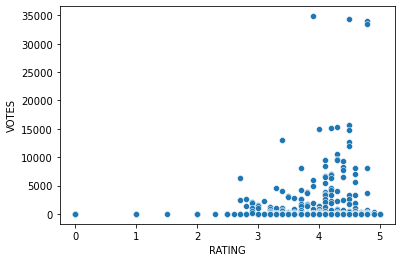

In [9]:
sns.scatterplot(x='RATING', y='VOTES', data= df)
plt.show()

**Calculate Correlation between the columns**

In [10]:
df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


**Assuming that every row in FILM column has the same format - Name of moviw followed by year.<br> Create a new column that is able to trip the year from title and set this new column as YEAR**

In [16]:
df['YEAR'] = df['FILM'].apply(lambda title : title.split('(')[-1].replace(')',''))

In [17]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**How many movies are there in dataframe per year?**

In [29]:
df['YEAR'].value_counts()

2015    478
2014     23
1         7
1964      1
2016      1
Name: YEAR, dtype: int64

**Visualize count of movie using a plot**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

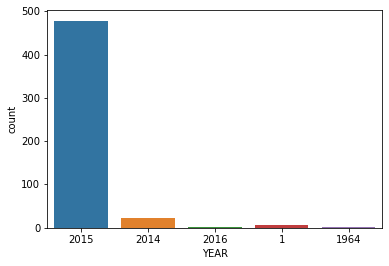

In [30]:
sns.countplot(data=df,x='YEAR')

**What are the top 10 movis with higest number of votes?**

In [31]:
df.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**How many movies have 0 votes?**

In [37]:
len(df[df['VOTES'] == 0])

73

**Create a dataframe of only reviewed movies by removing any films that have zero votes.**

In [41]:
df.shape

(510, 5)

In [43]:
df_new = df.drop(df[df['VOTES'] == 0].index , axis = 0)

In [44]:
df_new.shape

(437, 5)

**Create a KDE plot that displays distribution of ratings that are displayed(STARS) versus what the true rating was from the votes(RATING). Clip the KDE to 0-5** 

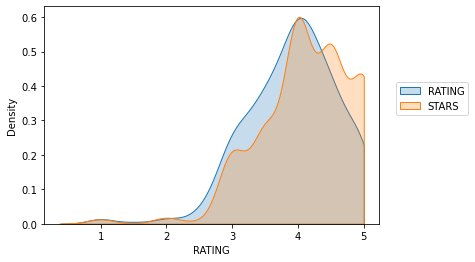

In [50]:
sns.kdeplot(data = df_new , x ="RATING",clip = [0,5], fill =True , label = 'RATING')
sns.kdeplot(data = df_new , x ="STARS",clip = [0,5], fill =True , label = 'STARS')
plt.legend(loc =(1.05,0.5) )

**Create a new column of the difference between STARS displayed versus true RATING. Calculate this difference and round it to the nearest decimal value**

In [51]:
df['STARS_DIFF'] = df['STARS'] - df['RATING']

In [52]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


In [54]:
 df['STARS_DIFF'] = df['STARS_DIFF'].round(2)

In [55]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**Create a count plot to display the number of times a certain difference occurs.**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

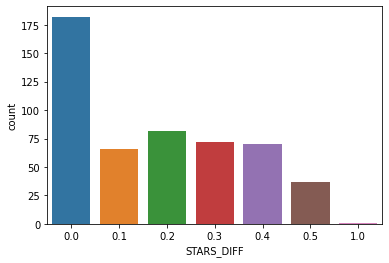

In [56]:
sns.countplot(data = df , x = 'STARS_DIFF')

**What movie has the 1.0 STARS_DIFF?**

In [59]:
df[df['STARS_DIFF'] == 1.0]['FILM']

381    Turbo Kid (2015)
Name: FILM, dtype: object

**PART 2: Comparing Fandango rating to other sites**

**Reading the all_sites_scores dataset**

In [60]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [61]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [62]:
all_sites.shape

(146, 8)

**ANALYZNG ROTTEN TOMATOES**

**Create a scatterplot exploring the relationship between RT Critic Reviews and RT User Reviews**

(0.0, 100.0)

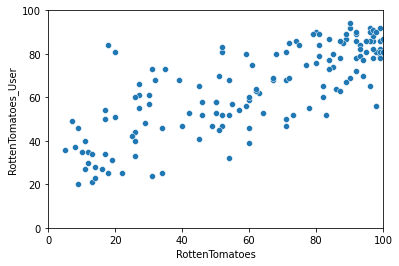

In [67]:
sns.scatterplot(data=all_sites , x ='RottenTomatoes' ,y ='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

**Create a new column based off the difference between critic ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes - RottenTomatoes_Users**

In [68]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [69]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


**Calculate the Mean Absolute Difference between RT scores and RT User scores**

In [71]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

**Plot the distribution of the differences between RT critics score and RT user score.**

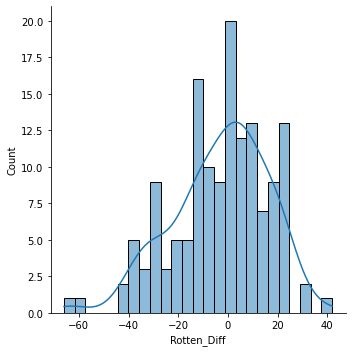

In [76]:
sns.displot(data = all_sites , x='Rotten_Diff', bins =25 ,kde=True)

**What are the top five movies users rated higher than critics on average**

In [84]:
all_sites.nsmallest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


**Now show the top five movies that critics rate higher than the user**

In [85]:
all_sites.nlargest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


**ANALYZING METACRITIC**

**Display a scatter plot of the Metacritic Rating versus the Metacritic User Rating**

(0.0, 10.0)

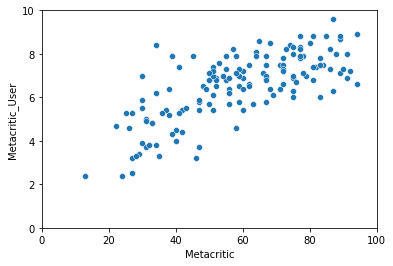

In [90]:
sns.scatterplot(data = all_sites, x='Metacritic', y ='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

**ANALYZING IMDB**

**Create a scatterplot for thr relationship between vote counts on MetaCritics  versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

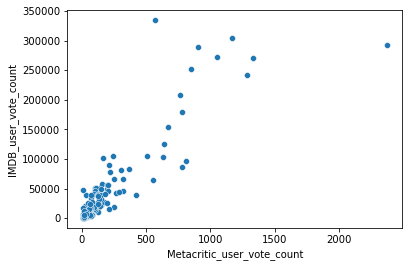

In [93]:
sns.scatterplot(data=all_sites , x= 'Metacritic_user_vote_count', y ='IMDB_user_vote_count')

**Notice that there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacriticratings. which movie is this?**

**What movie has the highest IMDB vote count?**

In [99]:
all_sites['IMDB_user_vote_count'].max()

334164

In [101]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**What movie has the highest Metacritic vote count?**

In [102]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


**PART 3 : Fandango Scores vs all sites**

**Merge Fandango dataset with all sites dataset**

In [108]:
df_all = pd.merge(df,all_sites, on='FILM', how='inner')

In [109]:
df_all.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


**Normalize columns to Fandango STARS and RATINGS**

In [110]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**Create a new normalized columns for all ratings so that they match up within 0-5 star range shown on Fandango**

In [115]:
df_all.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
STARS_DIFF                         0.5
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [116]:
df_all['RT_Norm'] = np.round(df_all['RottenTomatoes']/20,1)
df_all['RTU_Norm'] = np.round(df_all['RottenTomatoes_User']/20,1)

In [117]:
df_all['MC_Norm'] = np.round(df_all['Metacritic']/20,1)
df_all['MCU_Norm'] = np.round(df_all['Metacritic_User']/2,1)

In [118]:
df_all['IMDB_Norm'] = np.round(df_all['IMDB']/2,1)


In [119]:
df_all.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,MC_Norm,MCU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Now create a norm_scores DataFrame that only contains the normalized ratings. Include both STARS and RATINGS from the original Fandango table.**

In [120]:
df_all.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'STARS_DIFF',
       'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff', 'RT_Norm', 'RTU_Norm', 'MC_Norm',
       'MCU_Norm', 'IMDB_Norm'],
      dtype='object')

In [121]:
norm_scores = df_all[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'MC_Norm',
       'MCU_Norm', 'IMDB_Norm']]

In [122]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,MC_Norm,MCU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


**Comparing Distribution of Scores across the sites**

**Create a plot comparing the normalized distribution ratings across all the sites**

In [134]:
plt.figure(figsize=(20,10), dpi=800)
for i in norm_scores.columns:
    sns.kdeplot(data=norm_scores, x = i, fill=True, label = i , clip=(0,5))
plt.legend()

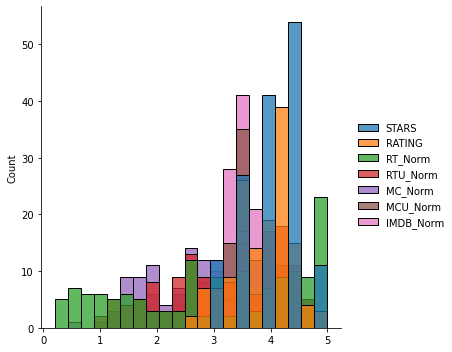

In [135]:
sns.displot(data=norm_scores)

**How are worst movies rated across all platform?** 

**Create a clustermap visualization of all normalized scores**

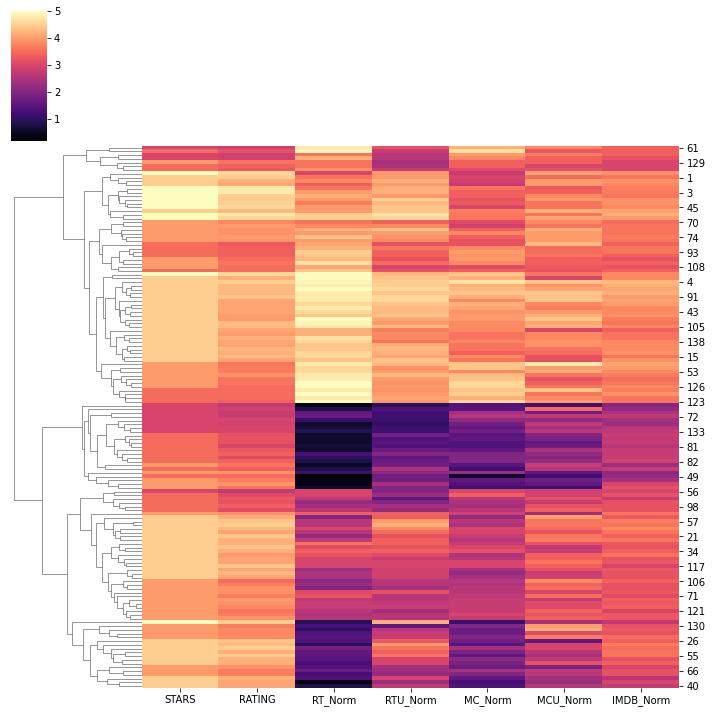

In [138]:
sns.clustermap(norm_scores,cmap='magma',col_cluster = False)

**Clearly Fandango is rating movie much higher than the rest sites.**

**Show 10 worst movies based of Rotten Tomatoes Critic movie rating**

In [139]:
df_all.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'STARS_DIFF',
       'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff', 'RT_Norm', 'RTU_Norm', 'MC_Norm',
       'MCU_Norm', 'IMDB_Norm'],
      dtype='object')

In [140]:
worst_movies = df_all[['FILM', 'STARS', 'RATING','RT_Norm', 'RTU_Norm', 'MC_Norm',
       'MCU_Norm', 'IMDB_Norm']]

In [143]:
worst_movies = worst_movies.nsmallest(10,'RT_Norm')

In [144]:
worst_movies

,FILM,STARS,RATING,RT_Norm,RTU_Norm,MC_Norm,MCU_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


<AxesSubplot:ylabel='Density'>

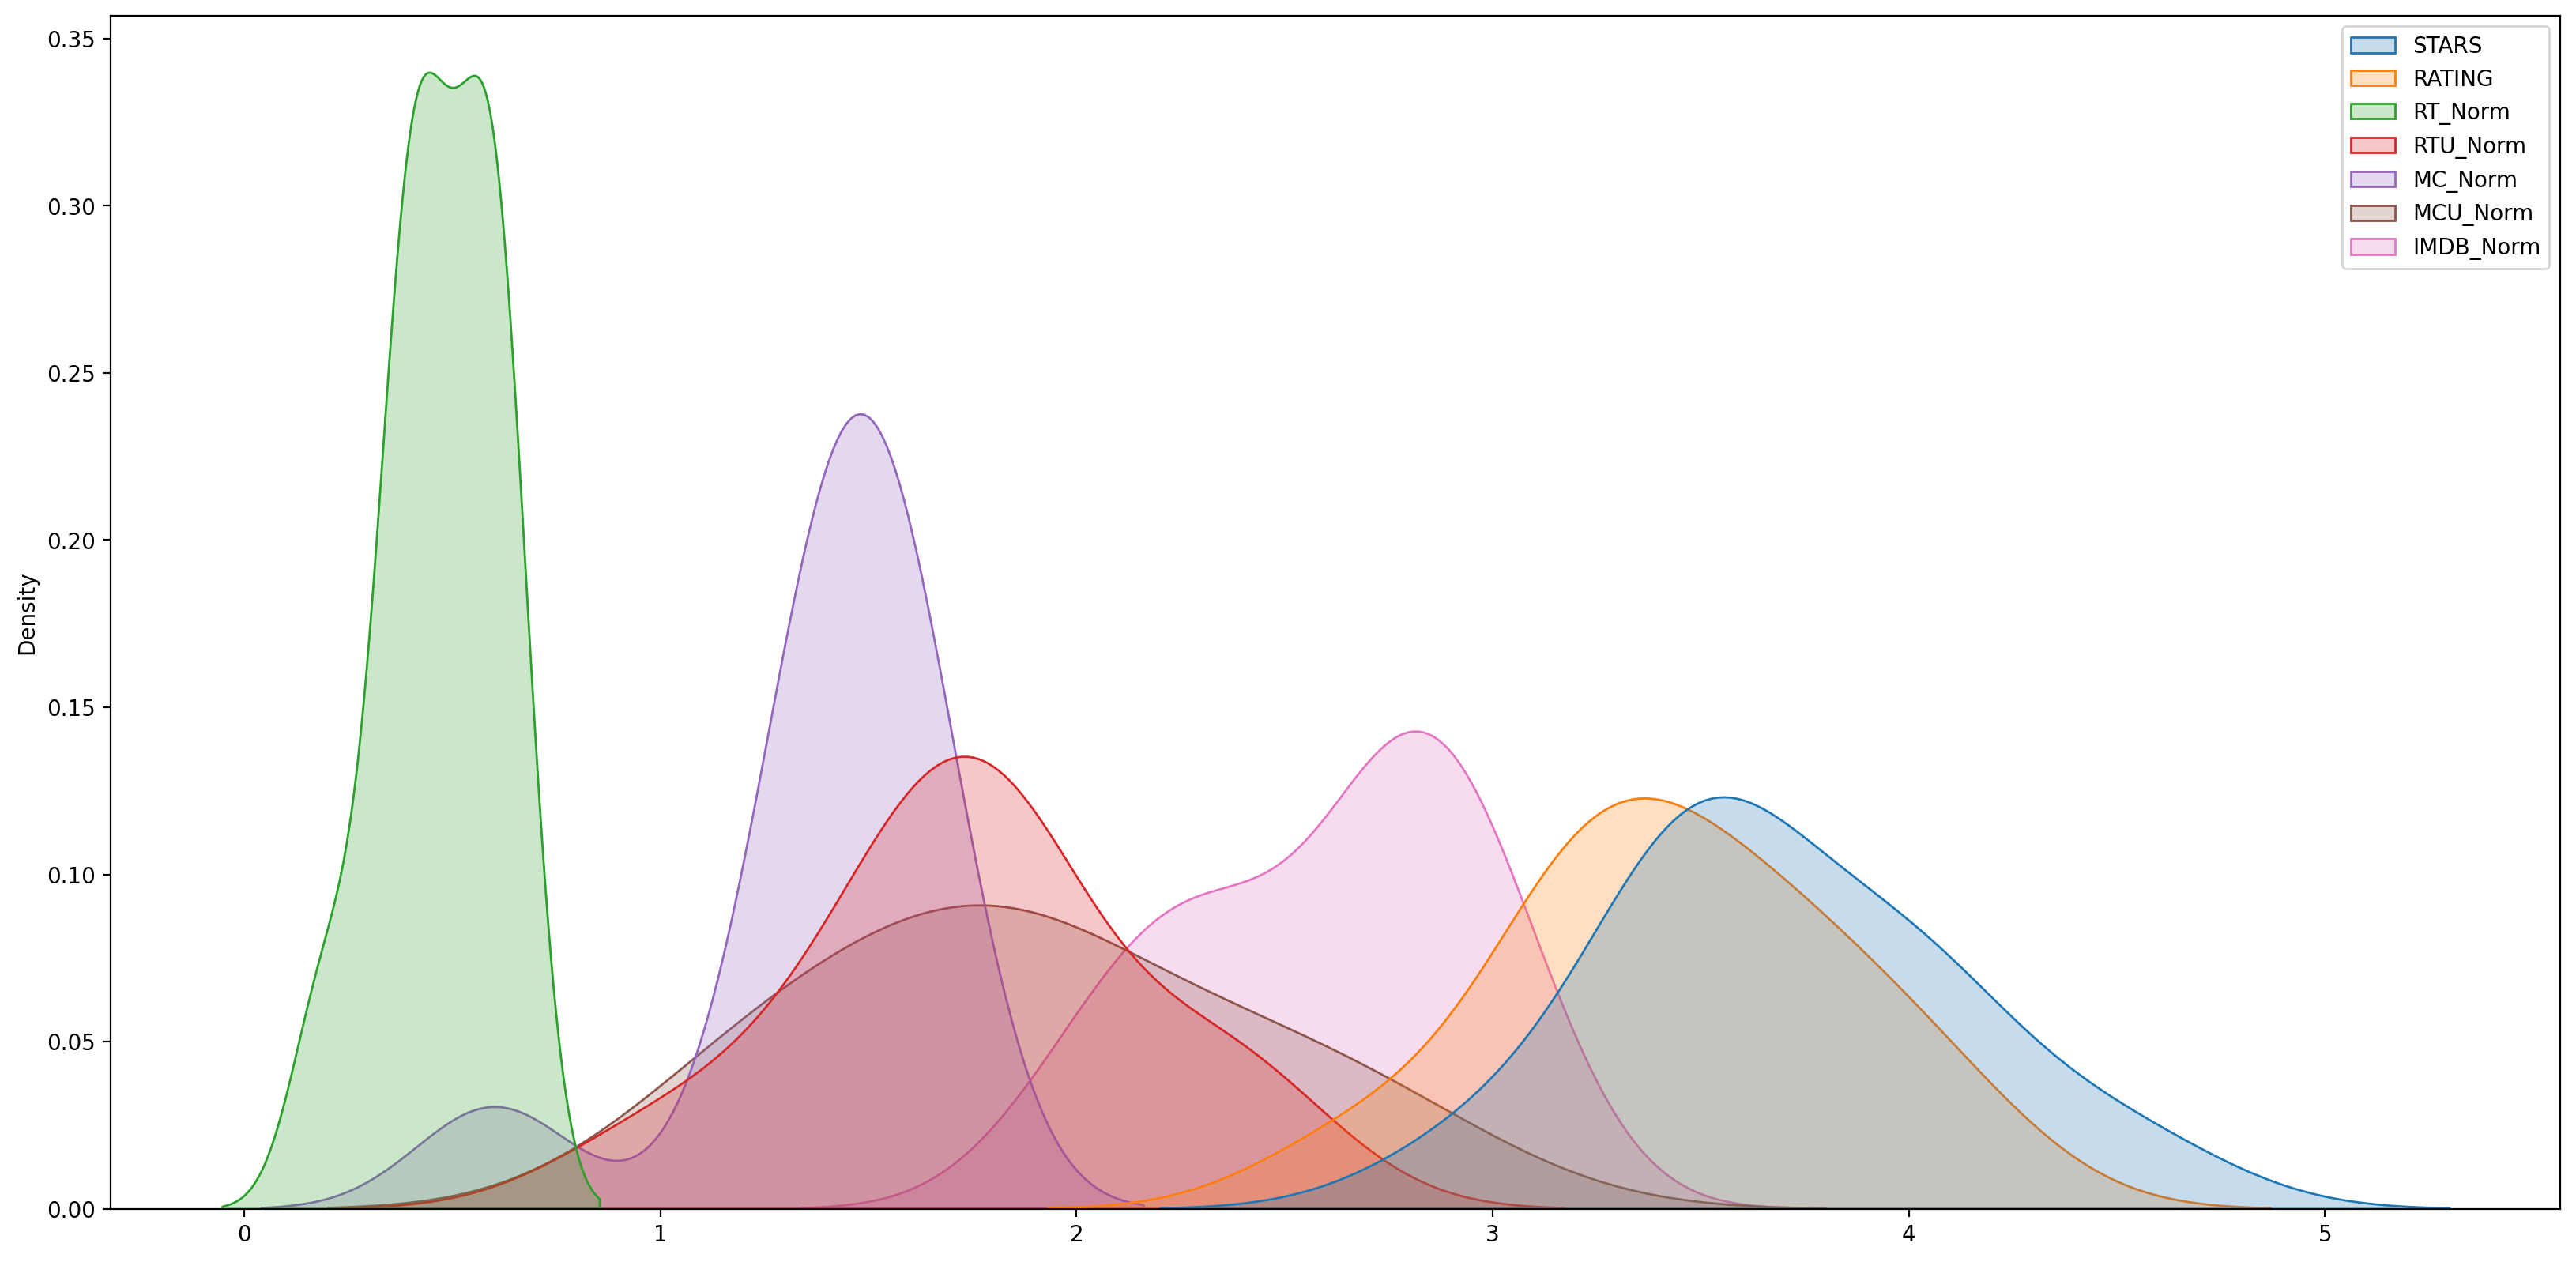

In [147]:
plt.figure(figsize=(20,10), dpi=200)
sns.kdeplot(data=worst_movies, fill = True)

# **Conclusion: Ratings displayed on Fandango website are not fair. The ratings displayed are much higher than the actual rating.**